# PREVISÃO DO CUSTO DE SAÚDE COM BASE NA IDADE

In [3]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#CARREGADMENTO DE DATASET E ATRIBUIÇÃO A UMA VARIAVEL
base_plano_saude = pd.read_csv('../Dados/Bases_de_dados/plano_saude.csv')
base_plano_saude 

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [5]:
# Divisao de variaveis previsores X e da classe y
X_plano_saude = base_plano_saude.iloc[:, 0].values # Varivel que armazena idade convertido em array (.values)
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [6]:
y_plano_saude = base_plano_saude.iloc[:, 1].values # variavel que armazena custo convertido em array (.values)
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [7]:
# COEFICIENTE DE CORELACAO ENTRE OS VALORES DE X E y GERACAO DE MATRIZ
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [8]:
#Reacriacao dos dados em matriz com vista a atender as exisgencias de sklearn
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

In [9]:
# TREINAMENTO DOS DADOS 
from sklearn.linear_model import LinearRegression 
regressor_plano_saude = LinearRegression(copy_X=True, fit_intercept=True, n_jobs='None', normalize=False)
regressor_plano_saude.fit(X_plano_saude, y_plano_saude) # Passamos atributos previsores e as respostas ou classe

C:\Users\leone\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs='None', normalize=False)

In [10]:
# b0 onde b0 corresponde o inicio da linha de regressao
regressor_plano_saude.intercept_

-558.9490909090907

In [11]:
# b1 o valor do coeficiente ou declive ou localizazao da linha
regressor_plano_saude.coef_

array([61.86787879])

In [12]:
# PREVISAO DE CUSTOS COM BASE NAS IDADES 
previsao = regressor_plano_saude.predict(X_plano_saude)
previsao

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [13]:
# CONVERSAO DE MATRIZ PARA VECTOR SIMPLES PARA GERAR GRAFICO COM SCATTER
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [21]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude) # Gerar grafico
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsao, name='Regressao_prevista')
grafico.show()

In [15]:
# TESTANDO COM IDADES DE FORMA SEPARADA
regressor_plano_saude.intercept_+regressor_plano_saude.coef_*18

array([554.67272727])

In [16]:
regressor_plano_saude.intercept_+regressor_plano_saude.coef_*23

array([864.01212121])

In [17]:
regressor_plano_saude.intercept_+regressor_plano_saude.coef_*80

array([4390.48121212])

In [18]:
# Outra forma de prever com predict
regressor_plano_saude.predict([[18]]) # lembre-se consultar no formato de matriz

array([554.67272727])

In [19]:
# AVALIACAO DA METRICA E ESTATISTICA
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879173

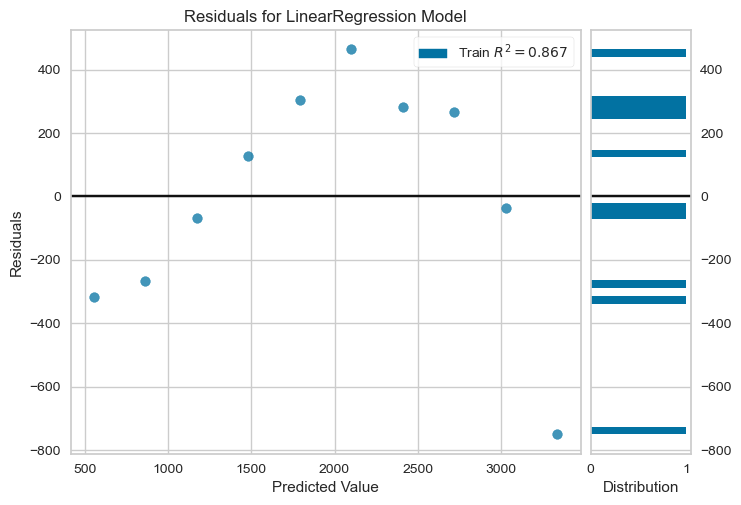

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
# VISUALIZACAO DOS RESIDUAIS OU O QUANTO OS VALORES ESTAO AFASTADOS DA LINHA DA REGRESSAO LINEAR
from yellowbrick.regressor import ResidualsPlot
Visualizador = ResidualsPlot(regressor_plano_saude)
Visualizador.fit(X_plano_saude, y_plano_saude)
Visualizador.poof()